In [1]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 5.3 MB/s 


In [2]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/data.csv')
df

,Date,A32,AAA,AAM,AAS,AAT,AAV,ABB,ABC,ABI,...,BED,BEL,BFC,BGW,BHA,BHC,BHG,BHK,BHN,BHP
0,2022-12-23,30.2,7.15,12.15,9.5,5.11,4.5,8.0,5.5,35.9,...,39.9,11.7,17.55,17.2,15.0,2.2,13.5,12.2,46.50,7.1
1,2022-12-22,30.2,7.20,11.80,9.9,5.20,4.8,8.2,4.9,35.7,...,39.9,11.7,17.90,17.2,14.5,2.4,13.5,12.2,46.50,7.1
2,2022-12-21,30.2,7.12,11.50,9.9,5.10,4.9,8.1,4.9,33.9,...,39.9,11.7,17.80,17.2,14.5,2.4,13.5,12.2,45.00,7.4
3,2022-12-20,30.2,7.18,11.65,10.2,4.98,5.0,8.2,4.9,34.6,...,39.9,11.7,18.40,17.2,14.3,2.4,13.5,12.2,46.70,7.4
4,2022-12-19,30.2,7.65,11.65,10.7,5.19,5.2,8.4,4.9,33.6,...,39.9,11.7,18.75,17.2,12.5,2.4,13.5,12.2,45.75,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,2020-01-08,24.5,12.00,12.50,NaN,NaN,8.4,NaN,9.7,30.0,...,39.0,11.7,11.35,12.0,6.9,2.7,12.1,16.5,77.00,9.2
742,2020-01-07,24.5,12.40,12.50,NaN,NaN,8.5,NaN,9.8,30.0,...,39.0,13.0,11.60,12.0,6.9,2.7,12.1,19.3,77.60,9.2
743,2020-01-06,24.5,12.30,12.50,NaN,NaN,8.4,NaN,10.6,30.0,...,39.0,13.0,11.50,12.0,6.9,2.7,12.1,22.7,77.90,9.2
744,2020-01-03,24.5,12.70,12.50,NaN,NaN,8.4,NaN,9.7,30.0,...,39.0,13.0,11.55,12.0,6.9,2.7,12.1,22.7,78.00,9.2


In [5]:
df = df.fillna(method='ffill')

In [6]:
df.isna().sum().sum()

0

In [7]:
dataset = df.iloc[:,1:]
dataset

,A32,AAA,AAM,AAS,AAT,AAV,ABB,ABC,ABI,ABR,...,BED,BEL,BFC,BGW,BHA,BHC,BHG,BHK,BHN,BHP
0,30.2,7.15,12.15,9.5,5.11,4.5,8.0,5.5,35.9,9.33,...,39.9,11.7,17.55,17.2,15.0,2.2,13.5,12.2,46.50,7.1
1,30.2,7.20,11.80,9.9,5.20,4.8,8.2,4.9,35.7,9.33,...,39.9,11.7,17.90,17.2,14.5,2.4,13.5,12.2,46.50,7.1
2,30.2,7.12,11.50,9.9,5.10,4.9,8.1,4.9,33.9,9.33,...,39.9,11.7,17.80,17.2,14.5,2.4,13.5,12.2,45.00,7.4
3,30.2,7.18,11.65,10.2,4.98,5.0,8.2,4.9,34.6,9.33,...,39.9,11.7,18.40,17.2,14.3,2.4,13.5,12.2,46.70,7.4
4,30.2,7.65,11.65,10.7,5.19,5.2,8.4,4.9,33.6,8.72,...,39.9,11.7,18.75,17.2,12.5,2.4,13.5,12.2,45.75,7.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,24.5,12.00,12.50,17.5,12.70,8.4,13.4,9.7,30.0,12.10,...,39.0,11.7,11.35,12.0,6.9,2.7,12.1,16.5,77.00,9.2
742,24.5,12.40,12.50,17.5,12.70,8.5,13.4,9.8,30.0,12.10,...,39.0,13.0,11.60,12.0,6.9,2.7,12.1,19.3,77.60,9.2
743,24.5,12.30,12.50,17.5,12.70,8.4,13.4,10.6,30.0,12.10,...,39.0,13.0,11.50,12.0,6.9,2.7,12.1,22.7,77.90,9.2
744,24.5,12.70,12.50,17.5,12.70,8.4,13.4,9.7,30.0,12.10,...,39.0,13.0,11.55,12.0,6.9,2.7,12.1,22.7,78.00,9.2


In [8]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

data_normalized = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(dataset)
print(data_normalized)

[[[ 0.75260444]
  [-0.58291008]
  [-0.29321062]
  ...
  [-0.29031363]
  [ 1.69702469]
  [-0.58580708]]

 [[ 0.76552484]
  [-0.58226111]
  [-0.31270392]
  ...
  [-0.28926416]
  [ 1.72069487]
  [-0.58812105]]

 [[ 0.78037105]
  [-0.59090033]
  [-0.33066772]
  ...
  [-0.28907803]
  [ 1.65969586]
  [-0.57426445]]

 ...

 [[ 0.26921117]
  [-0.32569831]
  [-0.31594569]
  ...
  [ 0.18143764]
  [ 2.87315919]
  [-0.47686383]]

 [[ 0.27109093]
  [-0.30749266]
  [-0.31729916]
  ...
  [ 0.18283241]
  [ 2.89433006]
  [-0.47910643]]

 [[ 0.43955738]
  [-0.30865671]
  [-0.34790729]
  ...
  [ 0.17952232]
  [ 2.79949821]
  [-0.48283114]]]


In [11]:
sz = data_normalized.shape[1]
print(sz)

100


38.558 --> 14.241 --> 14.241 --> 
15.478 --> 8.044 --> 8.034 --> 7.966 --> 7.827 --> 7.620 --> 7.546 --> 7.542 --> 7.542 --> 7.542 --> 
11.353 --> 5.292 --> 5.280 --> 5.280 --> 
8.256 --> 3.875 --> 3.838 --> 3.829 --> 3.826 --> 3.825 --> 3.825 --> 3.825 --> 3.825 --> 
6.121 --> 3.029 --> 3.014 --> 3.011 --> 3.004 --> 3.003 --> 3.002 --> 3.002 --> 3.002 --> 
5.656 --> 2.939 --> 2.923 --> 2.920 --> 2.913 --> 2.905 --> 2.846 --> 2.786 --> 2.785 --> 2.785 --> 
4.790 --> 2.525 --> 2.508 --> 2.507 --> 2.507 --> 2.500 --> 2.441 --> 2.381 --> 2.381 --> 2.381 --> 
3.115 --> 2.020 --> 2.014 --> 2.013 --> 2.013 --> 2.012 --> 1.997 --> 1.909 --> 1.887 --> 1.887 --> 1.887 --> 
2.992 --> 1.868 --> 1.833 --> 1.797 --> 1.768 --> 1.765 --> 1.750 --> 1.662 --> 1.640 --> 1.640 --> 1.640 --> 


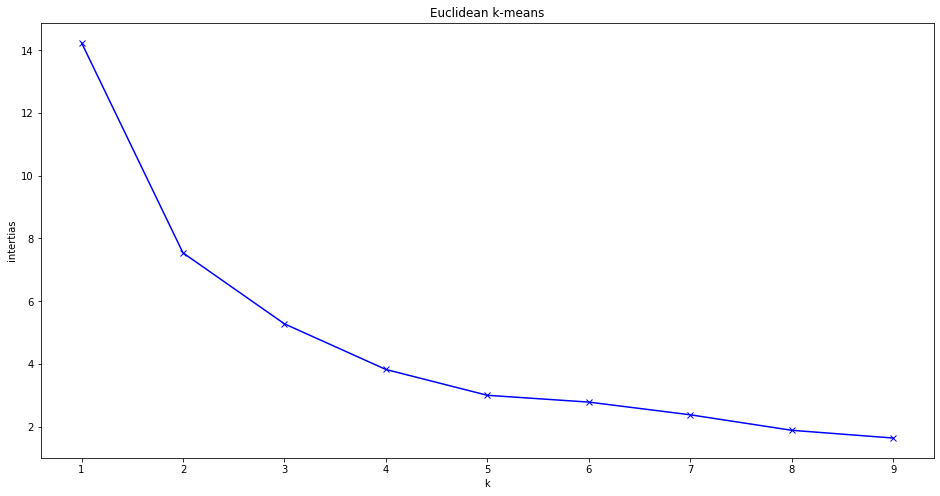

In [12]:
EKM_inertias = []
K = range(1,10)
for k in K:
  kmeanModel = TimeSeriesKMeans(n_clusters=k, verbose=True, random_state=0)
  y_pre = kmeanModel.fit_predict(data_normalized)
  EKM_inertias.append(kmeanModel.inertia_)
plt.figure(figsize = (16,8))
plt.plot(K, EKM_inertias,'bx-')
plt.xlabel('k')
plt.ylabel('intertias')
plt.title('Euclidean k-means')
plt.show()

Euclidean k-means
11.353 --> 5.292 --> 5.280 --> 5.280 --> 


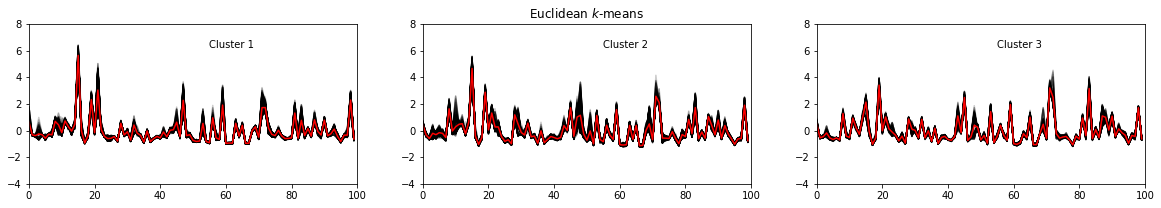

In [35]:
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=0)
y_pred = km.fit_predict(data_normalized)

plt.figure(figsize= (20,10))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in data_normalized[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 8)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished


23.203 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished


11.935 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished


11.935 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished


11.935 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished


11.935 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.3s finished


11.952 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.3s finished


7.288 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.3s finished


7.120 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.3s finished


7.011 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.3s finished


6.906 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.3s finished


6.905 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.3s finished


6.905 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.3s finished


6.905 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1492 out of 1492 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


8.123 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.696 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.645 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.637 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.635 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.635 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.635 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.635 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished


7.296 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished


4.179 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished


4.152 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished


4.136 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished


4.102 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished


4.072 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.7s finished


4.066 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished


4.065 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished


4.065 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Pa

5.113 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3730 out of 3730 | elapsed:    2.9s finished


3.131 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3730 out of 3730 | elapsed:    1.0s finished


3.042 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3730 out of 3730 | elapsed:    0.6s finished


3.031 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3730 out of 3730 | elapsed:    0.6s finished


3.031 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3730 out of 3730 | elapsed:    0.8s finished


3.031 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3730 out of 3730 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Pa

4.724 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.7s finished


2.671 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.8s finished


2.551 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.8s finished


2.538 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.9s finished


2.532 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.7s finished


2.509 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.8s finished


2.443 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.7s finished


2.394 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.8s finished


2.392 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.8s finished


2.392 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.8s finished


2.392 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.8s finished


2.392 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4476 out of 4476 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Pa

3.658 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5222 out of 5222 | elapsed:    0.9s finished


2.133 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5222 out of 5222 | elapsed:    1.1s finished


2.046 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5222 out of 5222 | elapsed:    0.9s finished


2.039 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5222 out of 5222 | elapsed:    0.9s finished


2.039 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5222 out of 5222 | elapsed:    0.9s finished


2.038 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5222 out of 5222 | elapsed:    0.9s finished


2.038 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5222 out of 5222 | elapsed:    0.9s finished


2.038 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5222 out of 5222 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Pa

2.992 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5968 out of 5968 | elapsed:    1.0s finished


2.099 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5968 out of 5968 | elapsed:    1.2s finished


2.086 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5968 out of 5968 | elapsed:    1.0s finished


2.082 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5968 out of 5968 | elapsed:    1.0s finished


2.082 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5968 out of 5968 | elapsed:    1.0s finished


2.082 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5968 out of 5968 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2984 out of 2984 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Pa

2.553 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6714 out of 6714 | elapsed:    1.1s finished


1.720 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6714 out of 6714 | elapsed:    1.1s finished


1.698 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6714 out of 6714 | elapsed:    1.1s finished


1.688 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6714 out of 6714 | elapsed:    1.3s finished


1.683 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6714 out of 6714 | elapsed:    1.1s finished


1.683 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6714 out of 6714 | elapsed:    1.1s finished


1.683 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6714 out of 6714 | elapsed:    1.1s finished


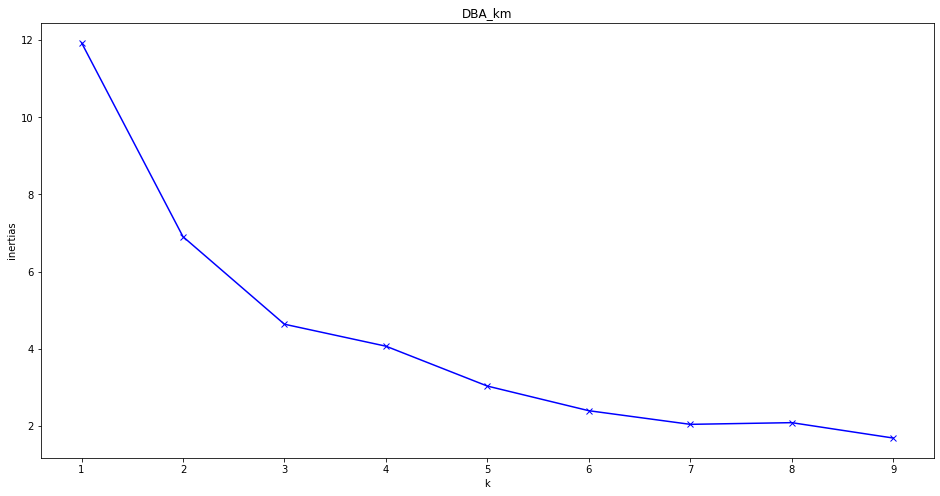

In [25]:
EKM_inertias = []
K = range(1,10)
for k in K:
  kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="dtw", verbose=True, random_state=0)
  y_pre = kmeanModel.fit_predict(data_normalized)
  EKM_inertias.append(kmeanModel.inertia_)
plt.figure(figsize = (16,8))
plt.plot(K, EKM_inertias,'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('DBA_km')
plt.show()

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


8.123 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.696 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.645 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.637 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.635 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.635 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.635 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.635 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 746 out of 746 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


6.861 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.529 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.520 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.6s finished


4.500 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.426 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.368 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.363 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.360 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.359 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.4s finished


4.359 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2238 out of 2238 | elapsed:    0.8s finished


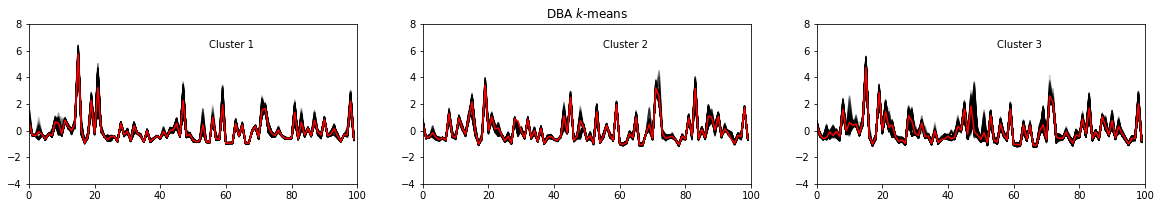

In [31]:
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=0)
y_pred = dba_km.fit_predict(data_normalized)

plt.figure(figsize= (20,10))
for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in data_normalized[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 8)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

684.179 --> 157.384 --> 157.336 --> 157.355 --> 157.341 --> 157.349 --> 157.346 --> 157.356 --> 157.357 --> 157.373 --> 157.376 --> 157.393 --> 157.394 --> 157.400 --> 157.378 --> 157.379 --> 157.298 --> 157.283 --> 157.099 --> 155.687 --> 155.537 --> 155.569 --> 155.540 --> 155.550 --> 155.546 --> 155.548 --> 155.547 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 155.548 --> 
148.408 --> 59.798 --> 57.007 --> 55.958 --> 55.908 --> 55.853 --> 55.850 --> 55.848 --> 55.845 --> 55.846 --> 55.842 --> 55.845 --> 55.828 --> 55.774 --> 55.746 --> 55.729 --> 55.724 --> 55.719 --> 55.714 --> 55.711 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 55.709 --> 
83.666 --> 29.898 --> 2

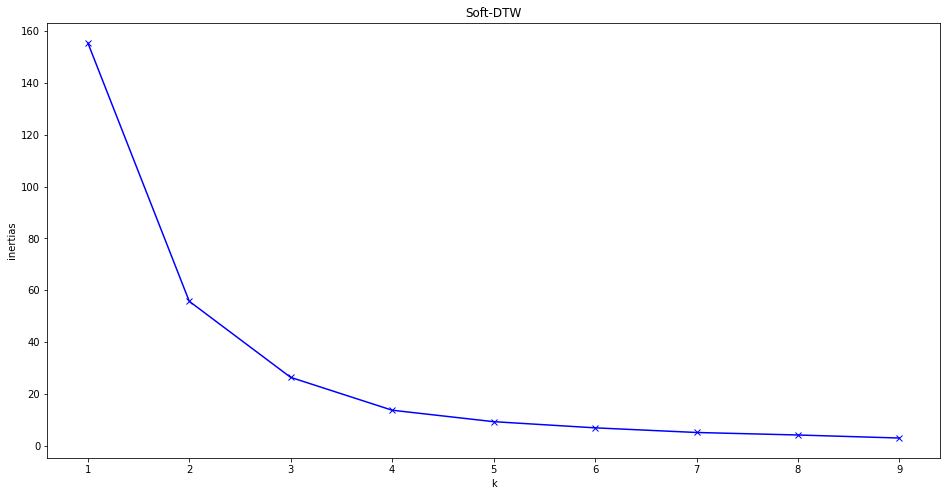

In [33]:
EKM_inertias = []
K = range(1,10)
for k in K:
  kmeanModel = TimeSeriesKMeans(n_clusters=k, metric="softdtw", metric_params={"gamma": .01}, verbose=True, random_state=0)
  y_pre = kmeanModel.fit_predict(data_normalized)
  EKM_inertias.append(kmeanModel.inertia_)
plt.figure(figsize = (16,8))
plt.plot(K, EKM_inertias,'bx-')
plt.xlabel('k')
plt.ylabel('inertias')
plt.title('Soft-DTW')
plt.show()

Soft-DTW k-means
83.666 --> 29.898 --> 29.286 --> 27.958 --> 26.820 --> 26.666 --> 26.630 --> 26.575 --> 26.582 --> 26.563 --> 26.571 --> 26.571 --> 26.570 --> 26.560 --> 26.560 --> 26.565 --> 26.558 --> 26.364 --> 26.322 --> 26.320 --> 26.318 --> 26.322 --> 26.318 --> 26.317 --> 26.317 --> 26.317 --> 26.317 --> 26.318 --> 26.318 --> 26.318 --> 26.318 --> 26.318 --> 26.318 --> 26.318 --> 26.318 --> 26.318 --> 26.318 --> 26.318 --> 26.318 --> 


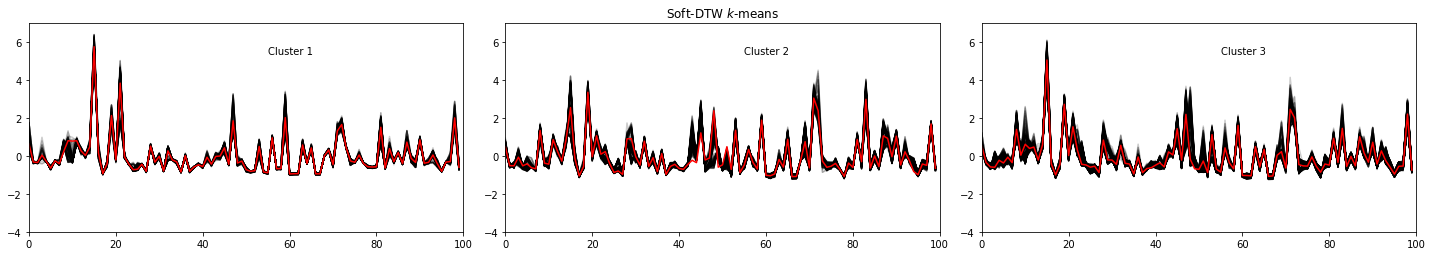

In [37]:
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=0)
y_pred = sdtw_km.fit_predict(data_normalized)
plt.figure(figsize= (20,10))
for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in data_normalized[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 7)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()